In [208]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.metrics import recall_score,accuracy_score, mean_squared_error, r2_score, log_loss, precision_score

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')

### 파일 불러오기

In [209]:
df = pd.read_csv("윈저라이징_inf제거.csv")

In [210]:
df

,Unnamed: 0,회사명,거래소코드,회계년도,총자본증가율,정상영업이익증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,...,실업률,외환보유액(천달러),CD이자율,환율,수출물가지수증감률,수입물가지수증감률,3년국고채수익률,생산자물가지수,생산자물가지수증감률,부실
0,0,(주)ES큐브,50120,2012,-16.575097,0.0,92.510776,1.564118,4.854248,-0.4200,...,3.1,316897731,2.89,1070.6,-2.367798,-0.724218,2.820,103.31,0.692008,0.0
1,1,(주)ES큐브,50120,2013,1.849357,0.0,-1427.915750,6.304012,4.692085,-53.5257,...,3.2,335647450,2.66,1055.4,-4.268391,-7.917155,2.858,101.66,-1.597135,0.0
2,2,(주)ES큐브,50120,2014,20.099174,0.0,96.260255,17.123515,-24.126991,-53.5257,...,3.6,353600472,2.13,1099.3,-5.961831,-8.166371,2.098,101.12,-0.531182,0.0
3,3,(주)ES큐브,50120,2015,-1.751499,0.0,-274.898482,0.053133,-5.188115,44.4400,...,3.5,358513845,1.67,1172.5,-5.217313,-18.112831,1.662,97.06,-4.015032,0.0
4,4,(주)ES큐브,50120,2016,89.076046,0.0,1033.661139,44.390095,-18.654872,-23.0800,...,3.4,361701404,1.52,1207.7,-3.297016,-4.409925,1.638,95.30,-1.813311,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12317,12317,한화화인케미칼(주),25850,2013,0.000000,0.0,0.000000,0.000000,0.000000,-6.8600,...,3.2,335647450,2.66,1055.4,-4.268391,-7.917155,2.858,101.66,-1.597135,1.0
12318,12318,핸즈코퍼레이션(주),143210,2022,-3.617503,0.0,-21.656986,-25.683177,38.426889,-24.2500,...,3.0,399043064,3.98,1264.5,16.641876,20.573937,3.722,115.29,8.375635,1.0
12319,12319,현대로템(주),64350,2015,14.613589,0.0,-1427.915750,-17.312414,3.698453,-1.4100,...,3.5,358513845,1.67,1172.5,-5.217313,-18.112831,1.662,97.06,-4.015032,1.0
12320,12320,현대페인트(주),11720,2012,0.000000,0.0,0.000000,0.000000,0.000000,-1.4500,...,3.1,316897731,2.89,1070.6,-2.367798,-0.724218,2.820,103.31,0.692008,1.0


In [211]:
df = pd.read_csv('윈저라이징_inf제거.csv',index_col = 0)
df = df.drop(columns = ['코스닥연수익률 (%)', '코스피연수익률(%)','코스닥변동성', '코스피변동성'])

In [212]:
df

,회사명,거래소코드,회계년도,총자본증가율,정상영업이익증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,매출액총이익률,...,실업률,외환보유액(천달러),CD이자율,환율,수출물가지수증감률,수입물가지수증감률,3년국고채수익률,생산자물가지수,생산자물가지수증감률,부실
0,(주)ES큐브,50120,2012,-16.575097,0.0,92.510776,1.564118,4.854248,-0.4200,28.015517,...,3.1,316897731,2.89,1070.6,-2.367798,-0.724218,2.820,103.31,0.692008,0.0
1,(주)ES큐브,50120,2013,1.849357,0.0,-1427.915750,6.304012,4.692085,-53.5257,24.759975,...,3.2,335647450,2.66,1055.4,-4.268391,-7.917155,2.858,101.66,-1.597135,0.0
2,(주)ES큐브,50120,2014,20.099174,0.0,96.260255,17.123515,-24.126991,-53.5257,21.419545,...,3.6,353600472,2.13,1099.3,-5.961831,-8.166371,2.098,101.12,-0.531182,0.0
3,(주)ES큐브,50120,2015,-1.751499,0.0,-274.898482,0.053133,-5.188115,44.4400,27.803407,...,3.5,358513845,1.67,1172.5,-5.217313,-18.112831,1.662,97.06,-4.015032,0.0
4,(주)ES큐브,50120,2016,89.076046,0.0,1033.661139,44.390095,-18.654872,-23.0800,28.682162,...,3.4,361701404,1.52,1207.7,-3.297016,-4.409925,1.638,95.30,-1.813311,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12317,한화화인케미칼(주),25850,2013,0.000000,0.0,0.000000,0.000000,0.000000,-6.8600,-18.891623,...,3.2,335647450,2.66,1055.4,-4.268391,-7.917155,2.858,101.66,-1.597135,1.0
12318,핸즈코퍼레이션(주),143210,2022,-3.617503,0.0,-21.656986,-25.683177,38.426889,-24.2500,4.960248,...,3.0,399043064,3.98,1264.5,16.641876,20.573937,3.722,115.29,8.375635,1.0
12319,현대로템(주),64350,2015,14.613589,0.0,-1427.915750,-17.312414,3.698453,-1.4100,-0.362243,...,3.5,358513845,1.67,1172.5,-5.217313,-18.112831,1.662,97.06,-4.015032,1.0
12320,현대페인트(주),11720,2012,0.000000,0.0,0.000000,0.000000,0.000000,-1.4500,22.162032,...,3.1,316897731,2.89,1070.6,-2.367798,-0.724218,2.820,103.31,0.692008,1.0


In [213]:
len(df.columns)

71

In [214]:
X_data = df.drop(columns=['회사명', '거래소코드', '회계년도', '부실'])
y_data = df['부실']

### 데이터 split

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3,stratify=y_data,random_state = 42)

In [216]:
n, d = X_train.shape
print("number of features:", d)
print("number of samples:", n)

number of features: 67
number of samples: 8625


### Feature Selection

#### Decision Tree

In [217]:
def feature_selection_decision_tree(X, y, max_features=None):
    dt = DecisionTreeClassifier(max_features=max_features, random_state=42)
    dt.fit(X, y)
    importances = dt.feature_importances_
    selected_features_indices = np.argsort(importances)[::-1]
    selected_features = X.columns[selected_features_indices]
    return selected_features

# Decision Tree를 사용하여 피처 선택
selected_features = feature_selection_decision_tree(X_train, y_train)

print("Selected features:", selected_features)

Selected features: Index(['매출액정상영업이익률', '사내유보 대 자기자본비율', 'CASH FLOW 대 매출액비율', '금융비용부담률',
       '타인자본회전률', '정상영업이익증가율', '순이익증가율', '총자산영업이익률', '총자본증가율', '경기동행지수',
       'CASH FLOW 대 총자본비율', '자기자본증가율', '1주당매출액', '유보율', 'CASH FLOW 대 부채비율',
       '재고자산회전률', '재고자산 대 순운전자본비율', '1주당순이익', '총자산순이익률', '자기자본구성비율', '자기자본회전률',
       '기계투자효율', '1주당 CASH FLOW', '매출액순이익률', '매출액총이익률', '유동비율', 'CP전년대비증가율',
       '자기자본정상영업이익률', '순운전자본회전률', '현금비율', '기계장비율', '매출채권회전률', '당좌자산회전률',
       '운전자본회전률', '종업원수증가율', '자본집약도', '실질GDP성장률', '종업원1인당 부가가치', '노동장비율',
       '총자본투자효율', '노동소득분배율', '유동자산회전률', '매출액증가율', '당좌비율', '매출채권 대 매입채무비율',
       '1주당순자산', 'CPI증감률', '생산자물가지수증감률', 'GDP대비국가부채비율', 'CD이자율', '수입물가지수증감률',
       '자기자본순이익률', '부가가치율', '총자본회전률', '외환보유액(천달러)', '설비투자효율',
       'CASH FLOW 대 차입금비율', '경기선행지수', '환율', '수지비율(관계기업투자손익 제외)', '생산자물가지수',
       '장단기금리차(전월차)(%p)', '실업률', '수출물가지수증감률', '부채비율', '3년국고채수익률', 'CPI'],
      dtype='object')


In [218]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [219]:
feat_importance = clf.tree_.compute_feature_importances(normalize=True)
print(feat_importance)

[2.08643395e-02 2.52857981e-02 1.55545276e-02 1.54892134e-02
 4.12444156e-03 7.61155685e-03 8.71717936e-03 3.14445453e-01
 1.10852268e-02 6.68314676e-03 2.80659262e-03 3.63223995e-02
 0.00000000e+00 1.06914904e-01 4.70116215e-03 1.13587008e-02
 3.26566909e-02 2.12620653e-03 1.16376598e-02 1.31033542e-02
 6.15208703e-03 5.20795625e-03 7.34450222e-03 8.53559184e-03
 5.78085182e-03 5.49666879e-03 2.60403417e-04 7.01512970e-04
 3.31688219e-03 1.02054192e-02 6.69348293e-03 1.75086746e-02
 1.09541856e-02 1.59181422e-03 3.97008764e-03 7.54326403e-03
 7.27136407e-03 9.04928038e-03 5.92203564e-03 1.40325229e-02
 7.99037786e-03 9.03387719e-03 1.02418046e-02 0.00000000e+00
 1.60951152e-02 5.56283436e-02 2.13390355e-02 5.49690397e-03
 2.15714185e-02 1.36570865e-02 6.41002203e-03 3.64111633e-03
 1.79213896e-02 7.32862677e-04 0.00000000e+00 1.95976004e-03
 7.65434351e-04 0.00000000e+00 7.65434351e-04 0.00000000e+00
 2.82245471e-03 1.25852315e-03 0.00000000e+00 5.07096677e-03
 2.63263027e-03 0.000000

In [220]:
pd.Series(feat_importance, index = X_train.columns).sort_values(ascending=False).head(20)

매출액정상영업이익률           0.314445
사내유보 대 자기자본비율        0.106915
CASH FLOW 대 매출액비율    0.055628
금융비용부담률              0.036322
타인자본회전률              0.032657
정상영업이익증가율            0.025286
총자산영업이익률             0.021571
1주당매출액               0.021339
총자본증가율               0.020864
경기동행지수               0.017921
유보율                  0.017509
CASH FLOW 대 총자본비율    0.016095
순이익증가율               0.015555
자기자본증가율              0.015489
재고자산 대 순운전자본비율       0.014033
총자산순이익률              0.013657
재고자산회전률              0.013103
당좌자산회전률              0.011638
자기자본회전률              0.011359
매출액순이익률              0.011085
dtype: float64

#### 라쏘

In [224]:
alpha = 0.1
lasso = Lasso(alpha=alpha, max_iter= 10000).fit(X_train, y_train)

# 회귀 계수 추출
coefficients = abs(lasso.coef_)
feature_names = X_data.columns

# 회귀 계수를 데이터프레임으로 변환
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 계수를 내림차순으로 정렬
coef_df = coef_df[coef_df['Coefficient'] != 0]
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 상위 10개의 피처와 계수만 출력
# top_10_coef_df = coef_df.head(10)
coef_df.reset_index(drop = True)
# top_10_coef_df
 

,Feature,Coefficient
0,CASH FLOW 대 매출액비율,3.694892e-03
1,자기자본정상영업이익률,3.556241e-03
2,매출액순이익률,3.054185e-03
3,사내유보 대 자기자본비율,9.745598e-04
4,자기자본순이익률,9.533694e-04
5,부가가치율,6.097521e-04
6,자기자본구성비율,4.487815e-04
7,자기자본증가율,2.298313e-04
8,종업원수증가율,2.085281e-04
9,당좌비율,1.703340e-04


In [ ]:
def feature_selection_lasso(X, y, alpha=0.9):
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    selected_features = X.columns[lasso.coef_ != 0]
    return selected_features

# 라쏘를 사용하여 피처 선택
selected_features = feature_selection_lasso(X_train, y_train)

print("Selected features:", selected_features)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
def feature_selection_lasso(X, y, alpha=0.1):
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    selected_features = X.columns[lasso.coef_ != 0]
    return selected_features

# 라쏘를 사용하여 피처 선택
selected_features = feature_selection_lasso(X_train, y_train)

print("Selected features:", selected_features)

Selected features: Index(['정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '매출액순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '사내유보 대 자기자본비율', '재고자산회전률', '종업원1인당 부가가치',
       '노동장비율', '기계장비율', '자본집약도', '총자본투자효율', '설비투자효율', '1주당순이익',
       '1주당 CASH FLOW', '유보율', '기계투자효율', '부가가치율', '노동소득분배율', '자기자본구성비율',
       '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율', '부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 매출액비율', '1주당매출액', '1주당순자산',
       '외환보유액(천달러)', '환율'],
      dtype='object')


In [ ]:
alpha = 0.1
lasso = Lasso(alpha=alpha, max_iter= 10000).fit(X_train, y_train)
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

feature_list

array(['정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '매출액순이익률',
       '자기자본정상영업이익률', '자기자본순이익률', '사내유보 대 자기자본비율', '재고자산회전률',
       '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '총자본투자효율', '설비투자효율',
       '1주당순이익', '1주당 CASH FLOW', '유보율', '기계투자효율', '부가가치율', '노동소득분배율',
       '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율',
       '매출채권 대 매입채무비율', '부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 매출액비율',
       '1주당매출액', '1주당순자산', '외환보유액(천달러)', '환율'], dtype=object)

In [ ]:
lasso.coef_

array([ 0.00000000e+00,  2.24469525e-05,  2.16614958e-05,  2.29831255e-04,
        9.52891847e-05, -2.08528134e-04,  0.00000000e+00, -0.00000000e+00,
       -3.05418546e-03, -3.55624080e-03, -9.53369410e-04,  0.00000000e+00,
        0.00000000e+00, -9.74559752e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.16035727e-06,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -2.28727352e-06,
        3.20639319e-05, -2.45603720e-05, -2.02127062e-06, -1.03348004e-04,
        5.36153356e-06,  1.40135511e-06,  7.52387140e-07,  2.49273408e-07,
       -4.45990921e-09,  6.09752099e-04,  9.47471575e-05, -4.48781491e-04,
       -1.37986554e-04,  1.70333991e-04,  6.92345782e-05, -2.34035725e-05,
        2.86707705e-06,  1.35995878e-04,  0.00000000e+00,  3.22388402e-06,
       -0.00000000e+00, -3.69489247e-03, -2.16919571e-07, -7.63450427e-08,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [ ]:
# 회귀 계수와 피처 이름을 묶어서 데이터프레임으로 생성
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso.coef_[0]})


# 회귀 계수를 크기순으로 정렬
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 회귀 계수가 큰 값부터 차례로 출력
for index, row in sorted_coef_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']}")

총자본증가율: 0.0
CP전년대비증가율: 0.0
유동비율: 0.0
당좌비율: 0.0
현금비율: 0.0
재고자산 대 순운전자본비율: 0.0
매출채권 대 매입채무비율: 0.0
부채비율: 0.0
CASH FLOW 대 부채비율: 0.0
CASH FLOW 대 차입금비율: 0.0
CASH FLOW 대 총자본비율: 0.0
CASH FLOW 대 매출액비율: 0.0
1주당매출액: 0.0
1주당순자산: 0.0
총자산영업이익률: 0.0
총자산순이익률: 0.0
경기선행지수: 0.0
노동소득분배율: 0.0
경기동행지수: 0.0
GDP대비국가부채비율: 0.0
CPI: 0.0
CPI증감률: 0.0
실질GDP성장률: 0.0
장단기금리차(전월차)(%p): 0.0
실업률: 0.0
외환보유액(천달러): 0.0
CD이자율: 0.0
환율: 0.0
수출물가지수증감률: 0.0
수입물가지수증감률: 0.0
3년국고채수익률: 0.0
생산자물가지수: 0.0
자기자본구성비율: 0.0
부가가치율: 0.0
정상영업이익증가율: 0.0
타인자본회전률: 0.0
순이익증가율: 0.0
자기자본증가율: 0.0
매출액증가율: 0.0
종업원수증가율: 0.0
매출액총이익률: 0.0
매출액정상영업이익률: 0.0
매출액순이익률: 0.0
자기자본정상영업이익률: 0.0
자기자본순이익률: 0.0
금융비용부담률: 0.0
수지비율(관계기업투자손익 제외): 0.0
사내유보 대 자기자본비율: 0.0
총자본회전률: 0.0
자기자본회전률: 0.0
유동자산회전률: 0.0
기계투자효율: 0.0
당좌자산회전률: 0.0
재고자산회전률: 0.0
매출채권회전률: 0.0
순운전자본회전률: 0.0
운전자본회전률: 0.0
종업원1인당 부가가치: 0.0
노동장비율: 0.0
기계장비율: 0.0
자본집약도: 0.0
총자본투자효율: 0.0
설비투자효율: 0.0
1주당순이익: 0.0
1주당 CASH FLOW: 0.0
유보율: 0.0
생산자물가지수증감률: 0.0


#### 라쏘CV

In [ ]:
a_list = 10**np.linspace(-1,5,7)
ratio = np.linspace(0,1,20)
mean_squred_err = lambda y, yhat:np((y-yhat)**2)

In [ ]:
lasso = LassoCV(alphas=a_list)
lasso.fit(X_train, y_train)

print("The best alpha value is ", lasso.alpha_)
print("Features selected:", lasso.coef_.nonzero()[0])
print("The R^2 is ", lasso.score(X_train, y_train))
print("The MSE of the best model is", mean_squared_error(y_train, lasso.predict(X_train)))


The best alpha value is  0.1
Features selected: [ 1  2  3  4  5  8  9 10 13 19 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 43 45 46 47 59 61]
The R^2 is  0.3983704671247017
The MSE of the best model is 0.04556507596855479


In [ ]:
# str = "1 2 3 4 8 9 10 13 19 23 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 43 45 46 47 50 59 61"
list_1 = list(lasso.coef_.nonzero()[0])
list_2 = []
for i in list_1:
    # list_2.append(X_train.columns[int(i)])
    print(X_train.columns[int(i)])
list_2

정상영업이익증가율
순이익증가율
자기자본증가율
매출액증가율
종업원수증가율
매출액순이익률
자기자본정상영업이익률
자기자본순이익률
사내유보 대 자기자본비율
재고자산회전률
종업원1인당 부가가치
노동장비율
기계장비율
자본집약도
총자본투자효율
설비투자효율
1주당순이익
1주당 CASH FLOW
유보율
기계투자효율
부가가치율
노동소득분배율
자기자본구성비율
유동비율
당좌비율
현금비율
재고자산 대 순운전자본비율
매출채권 대 매입채무비율
부채비율
CASH FLOW 대 차입금비율
CASH FLOW 대 매출액비율
1주당매출액
1주당순자산
외환보유액(천달러)
환율


[]

T-test

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def feature_selection_ttest(X, y, alpha=0.05):
    selected_features = []
    
    for column in X.columns:
        t_stat, p_value = ttest_ind(X.loc[y == 0, column], X.loc[y == 1, column])
        
        if p_value < alpha:
            selected_features.append(column)
    
    return selected_features

# t-test를 사용하여 피처 선택
selected_features = feature_selection_ttest(X_train, y_train)

print("Selected features:", selected_features)

Selected features: ['총자본증가율', '정상영업이익증가율', '순이익증가율', '매출액증가율', '종업원수증가율', '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율(관계기업투자손익 제외)', '사내유보 대 자기자본비율', '총자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '매출채권회전률', '순운전자본회전률', '종업원1인당 부가가치', '노동장비율', '총자본투자효율', '설비투자효율', '1주당순이익', '1주당 CASH FLOW', '유보율', '부가가치율', '노동소득분배율', '자기자본구성비율', '유동비율', '재고자산 대 순운전자본비율', '부채비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '1주당매출액', '1주당순자산', '총자산영업이익률', '총자산순이익률', 'CP전년대비증가율', '경기선행지수', '경기동행지수', 'GDP대비국가부채비율', '장단기금리차(전월차)(%p)', '실업률', '외환보유액(천달러)', 'CD이자율', '환율', '수출물가지수증감률', '수입물가지수증감률', '3년국고채수익률', '생산자물가지수증감률']


In [ ]:
def feature_selection_ttest(X, y, alpha=0.05):
    selected_features = []
    p_values = {}
    
    for column in X.columns:
        t_stat, p_value = ttest_ind(X.loc[y == 0, column], X.loc[y == 1, column])
        
        if p_value < alpha:
            selected_features.append(column)
            p_values[column] = p_value
    
    return selected_features, p_values

# t-test를 사용하여 피처 선택
selected_features, p_values = feature_selection_ttest(X_train, y_train)

print("Selected features:", selected_features)
print("P-values for selected features:", p_values)

Selected features: ['총자본증가율', '정상영업이익증가율', '순이익증가율', '매출액증가율', '종업원수증가율', '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율(관계기업투자손익 제외)', '사내유보 대 자기자본비율', '총자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '매출채권회전률', '순운전자본회전률', '종업원1인당 부가가치', '노동장비율', '총자본투자효율', '설비투자효율', '1주당순이익', '1주당 CASH FLOW', '유보율', '부가가치율', '노동소득분배율', '자기자본구성비율', '유동비율', '재고자산 대 순운전자본비율', '부채비율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '1주당매출액', '1주당순자산', '총자산영업이익률', '총자산순이익률', 'CP전년대비증가율', '경기선행지수', '경기동행지수', 'GDP대비국가부채비율', '장단기금리차(전월차)(%p)', '실업률', '외환보유액(천달러)', 'CD이자율', '환율', '수출물가지수증감률', '수입물가지수증감률', '3년국고채수익률', '생산자물가지수증감률']
P-values for selected features: {'총자본증가율': 0.026790320631544316, '정상영업이익증가율': 1.759993367313163e-05, '순이익증가율': 1.171936251282169e-27, '매출액증가율': 0.0009641872188230327, '종업원수증가율': 2.753345012165127e-21, '매출액총이익률': 7.719188036869909e-11, '매출액정상영업이익률': 0.0, '매출액순이익률': 0.0, '자기자본정상영업이익률': 0.0, '자기자본순이익률': 0.0, '금융비용부담률': 1.91

In [ ]:
# import numpy as np
# import pandas as pd
# from scipy import stats

# # 예시 데이터를 생성합니다.
# # 실제 사용 시에는 여러분의 데이터로 대체하세요.
# np.random.seed(0)
# X_train = np.random.normal(10, 2, (60, 3))  # 임의의 피처 데이터
# y_train = np.array([0] * 30 + [1] * 30)  # 타겟 데이터 (0: 30개, 1: 30개)

# # group1과 group2를 분리합니다.
# group1 = X_train[y_train == 0]
# group2 = X_train[y_train == 1]

# # 각 피처에 대해 t-검정을 수행하여 유의수준 0.05에서 유의한 변수를 선택합니다.
# significant_features = []
# for i in range(X_train.shape[1]):
#     t_statistic, p_value = stats.ttest_ind(group1[:, i], group2[:, i])
#     if p_value < 0.05:
#         significant_features.append(i)

# # 유의한 변수들을 출력합니다.
# print("유의한 변수들:", significant_features)


후진제거법

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_classification

# 데이터 생성
# X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# Train 데이터 분리 (예시)
# X_train = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
# y_train = pd.Series(y, name='target')

# DataFrame 확인 (디버깅 용도)
# print(X_train.head())
# print(y_train.head())

# 후진제거법을 사용한 피처 선택 함수
def backward_elimination(X, y, alpha=0.05):
    features = X.columns.tolist()
    
    while len(features) > 0:
        X_with_const = sm.add_constant(X[features])
        
        model = sm.OLS(y, X_with_const).fit()
        p_values = model.pvalues.iloc[1:]  # const 제외
        max_p_value = p_values.max()
        
        if max_p_value > alpha:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Removing feature '{excluded_feature}' with p-value {max_p_value}")
        else:
            break
    
    return features

# 후진제거법을 사용하여 피처 선택
selected_features = backward_elimination(X_train, y_train)

print("Selected features:", selected_features)


Removing feature '기계투자효율' with p-value 0.9987923171111817
Removing feature '수지비율(관계기업투자손익 제외)' with p-value 0.9947641344365497
Removing feature 'CPI' with p-value 0.9860604432770173
Removing feature '총자본투자효율' with p-value 0.9847941982085202
Removing feature '노동장비율' with p-value 0.9781637511764577
Removing feature '재고자산회전률' with p-value 0.9474111334282425
Removing feature '환율' with p-value 0.9457464898111833
Removing feature '매출액총이익률' with p-value 0.9376806125193204
Removing feature '종업원1인당 부가가치' with p-value 0.899595589721087
Removing feature '경기선행지수' with p-value 0.8537836476115147
Removing feature '실업률' with p-value 0.9824621101687081
Removing feature '장단기금리차(전월차)(%p)' with p-value 0.8567524678635227
Removing feature '3년국고채수익률' with p-value 0.8540770393679227
Removing feature '생산자물가지수증감률' with p-value 0.9720025034207266
Removing feature '자기자본순이익률' with p-value 0.7946730591000131
Removing feature '총자본증가율' with p-value 0.6722019219634077
Removing feature '총자본회전률' with p-value 0.6641583

In [ ]:
X_train = X_train[['정상영업이익증가율',
'순이익증가율',
'자기자본증가율',
'매출액증가율',
'매출액순이익률',
'자기자본정상영업이익률']]

In [ ]:
X_test = X_test[['정상영업이익증가율',
'순이익증가율',
'자기자본증가율',
'매출액증가율',
'매출액순이익률',
'자기자본정상영업이익률']]

In [ ]:
# X_test = X_test[['정상영업이익증가율',
# '순이익증가율',
# '자기자본증가율',
# '매출액증가율',
# '매출액순이익률',
# '자기자본정상영업이익률',
# '자기자본순이익률']]

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF를 계산합니다.
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


       feature       VIF
0    정상영업이익증가율  1.194477
1       순이익증가율  1.191462
2      자기자본증가율  1.334892
3       매출액증가율  1.377183
4      매출액순이익률  1.481908
5  자기자본정상영업이익률  1.723715


VIF 데이터:
       feature       VIF
0    정상영업이익증가율  1.194477
1       순이익증가율  1.191462
2      자기자본증가율  1.334892
3       매출액증가율  1.377183
4      매출액순이익률  1.481908
5  자기자본정상영업이익률  1.723715


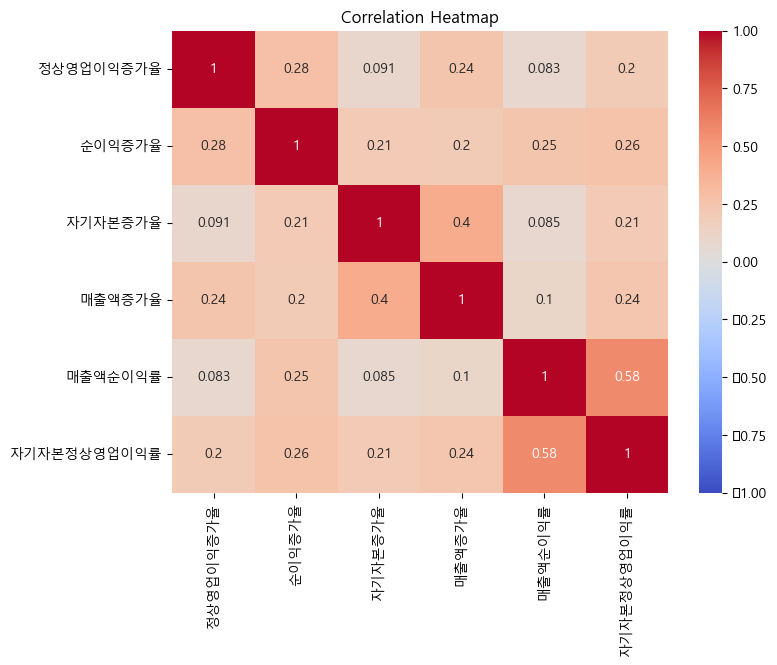

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# VIF를 계산합니다.
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("VIF 데이터:")
print(vif_data)

# 상관행렬을 계산합니다.
corr_matrix = X_train.corr()

# 히트맵을 그립니다.
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


### 스케일링

In [ ]:
Rbscaler = RobustScaler()
Rbscaler.fit(X_train)
X_scaled_train_rb = Rbscaler.transform(X_train)
Rbscaler.fit(X_test)
X_scaled_test_rb = Rbscaler.transform(X_test)


In [ ]:
Stdscaler = StandardScaler()
Stdscaler.fit(X_train)
X_scaled_train_Std = Stdscaler.transform(X_train)
Stdscaler.fit(X_test)
X_scaled_test_Std = Stdscaler.transform(X_test)

In [ ]:
Mmscaler = MinMaxScaler()
Mmscaler.fit(X_train)
X_scaled_train_Mm = Mmscaler.transform(X_train)
Mmscaler.fit(X_test)
X_scaled_test_Mm = Mmscaler.transform(X_test)


### 리샘플링

In [ ]:
from collections import Counter
from matplotlib import pyplot
def count_and_plot(y):
    counter = Counter(y)
    for k, v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' %(k,v,v /len(y) *100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

#### Borderline SMOTE

In [ ]:
X_train = X_scaled_train_Mm
X_test = X_scaled_test_Mm


Class=0, n=7913 (50.000%)
Class=1, n=7913 (50.000%)


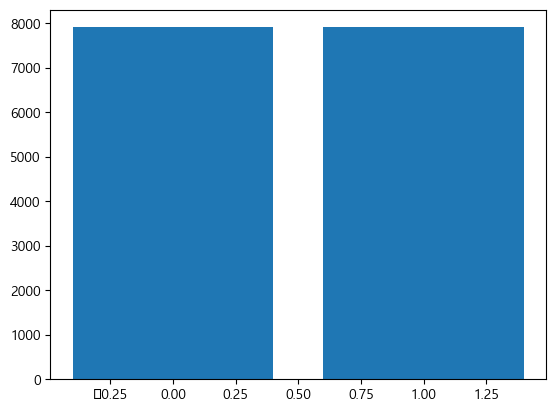

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X_train_resampled_b, y_train_resampled_b = BorderlineSMOTE(random_state=0).fit_resample(X_train, y_train)
count_and_plot(y_train_resampled_b)

#### SMOTE-Tomek

Class=0, n=7836 (49.756%)
Class=1, n=7913 (50.244%)


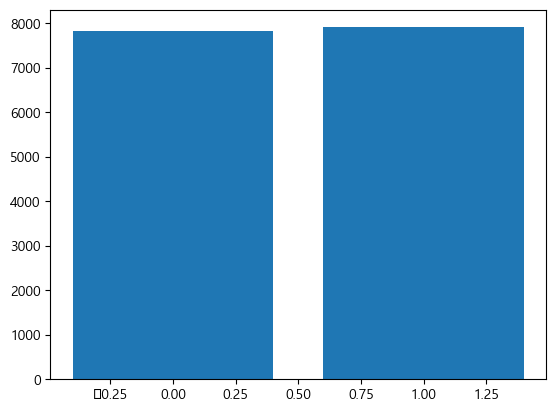

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_resampled_t, y_train_resampled_t = smoteto.fit_resample(X_train, y_train)
count_and_plot(y_train_resampled_t)

#### ADASYN

Class=0, n=7913 (50.514%)
Class=1, n=7752 (49.486%)


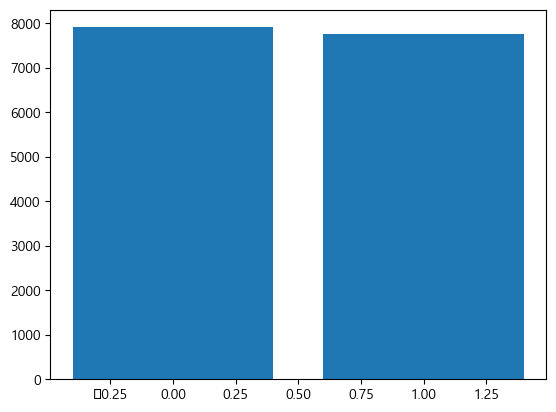

In [ ]:
from imblearn.over_sampling import ADASYN
X_train_resampled_a, y_train_resampled_a = ADASYN(random_state=42).fit_resample(X_train, y_train)
count_and_plot(y_train_resampled_a)

In [ ]:
X_train, y_train = X_train_resampled_t, y_train_resampled_t

### 로지스틱 회귀분석

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀 모델 생성과 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8991073843657019
Precision: 0.43795620437956206
Recall: 0.7868852459016393
F1 Score: 0.5627198124267293


In [ ]:
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 생성
logistic = LogisticRegression()

# 하이퍼파라미터 그리드 정의
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치로 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameter:", grid_search.best_params_)

# 최적의 모델을 테스트 데이터에 적용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameter: {'C': 100}
Accuracy: 0.8972139572626454
Precision: 0.4326750448833034
Recall: 0.7901639344262295
F1 Score: 0.5591647331786542


#### catboost

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# CatBoost 모델 생성
model = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss')

# 모델 학습
model.fit(X_train, y_train, verbose=0)

# 트레인 데이터에 대한 예측
y_pred2 = model.predict(X_train)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_train, y_pred2)
precision = precision_score(y_train, y_pred2)
recall = recall_score(y_train, y_pred2)
f1 = f1_score(y_train, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9100895294939362
Precision: 0.9132425900012721
Recall: 0.9072412485782889
F1 Score: 0.9102320273868392


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# CatBoost 모델 생성
model = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss')

# 모델 학습
model.fit(X_train, y_train, verbose=0)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(confusion_matrix)


Accuracy: 0.9023532593995132
Precision: 0.4507042253521127
Recall: 0.839344262295082
F1 Score: 0.5864833906071019
[[3080  312]
 [  49  256]]


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree 모델 생성
model = DecisionTreeClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.886394373816608
Precision: 0.3908918406072106
Recall: 0.6754098360655738
F1 Score: 0.4951923076923077


나이브 베이즈 분류기

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 나이브 베이즈 모델 생성
model = GaussianNB()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.895050040573438
Precision: 0.4118895966029724
Recall: 0.6360655737704918
F1 Score: 0.5


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 나이브 베이즈 모델 생성
model = GaussianNB()

# 하이퍼파라미터 그리드 정의 (가우시안 나이브 베이즈는 하이퍼파라미터가 없으므로 빈 딕셔너리로 정의)
param_grid = {}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치로 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameter:", grid_search.best_params_)

# 최적의 모델을 테스트 데이터에 적용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameter: {}
Accuracy: 0.895050040573438
Precision: 0.4118895966029724
Recall: 0.6360655737704918
F1 Score: 0.5


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 기본 나이브 베이즈 분류기 생성
base_model = GaussianNB()

# 배깅 분류기 생성
model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.895050040573438
Precision: 0.4118895966029724
Recall: 0.6360655737704918
F1 Score: 0.5


In [ ]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치할 파라미터 설정
param_grid = {
    'n_estimators': [5, 10, 15],  # 트리의 개수
    'base_estimator__var_smoothing': [1e-9, 1e-8, 1e-7]  # 가우시안 나이브 베이즈 모델의 smoothing 파라미터
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 다양한 평가 지표 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best parameters found:  {'base_estimator__var_smoothing': 1e-09, 'n_estimators': 15}
Best accuracy found:  0.7810654730400681
Accuracy: 0.895050040573438
Precision: 0.4118895966029724
Recall: 0.6360655737704918
F1 Score: 0.5
